# Prueba de Hipótesis con relación a una media
###### https://www.chreinvent.com/recursos/hip%C3%B3tesis-sobre-media
###### https://www.chreinvent.com/recursos/estad%C3%ADstico-de-prueba

In [11]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


+ Supongamos que queremos probar si la media de una muestra es diferente de 100 con un nivel de significancia de 0.05. 
+ Tenemos una muestra de 30 datos con una media muestral de 105 y una desviación estándar conocida de 15.
## I) Ejemplo con Estadístico z

In [12]:
# Datos de la muestra
n = 30
sample_mean = 105
population_mean = 100
population_std = 15
alpha = 0.05

# Calculo del estadístico z
z = (sample_mean - population_mean) / (population_std / np.sqrt(n))

# Calculo del valor p (prueba bilateral)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print(f'Estadístico z: {z}')
print(f'Valor p: {p_value}')

# Decisión
if p_value < alpha:
    print("Rechazar H0: hay suficiente evidencia para decir que la media es diferente de 100.")
else:
    print("No rechazar H0: no hay suficiente evidencia para decir que la media es diferente de 100.")

Estadístico z: 1.8257418583505538
Valor p: 0.067889154861829
No rechazar H0: no hay suficiente evidencia para decir que la media es diferente de 100.


## II) Ejemplo con Estadístico t

In [13]:
# Datos de la muestra
sample_std = 15  # desviación estándar muestral en lugar de poblacional

# Calculo del estadístico t
t = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Calculo del valor p (prueba bilateral)
p_value = 2 * (1 - stats.t.cdf(abs(t), df=n-1))

print(f'Estadístico t: {t}')
print(f'Valor p: {p_value}')

# Decisión
if p_value < alpha:
    print("Rechazar H0: hay suficiente evidencia para decir que la media es diferente de 100.")
else:
    print("No rechazar H0: no hay suficiente evidencia para decir que la media es diferente de 100.")


Estadístico t: 1.8257418583505538
Valor p: 0.07820332017206755
No rechazar H0: no hay suficiente evidencia para decir que la media es diferente de 100.


### I.b) Gráfico del ejemplo con estadístico z

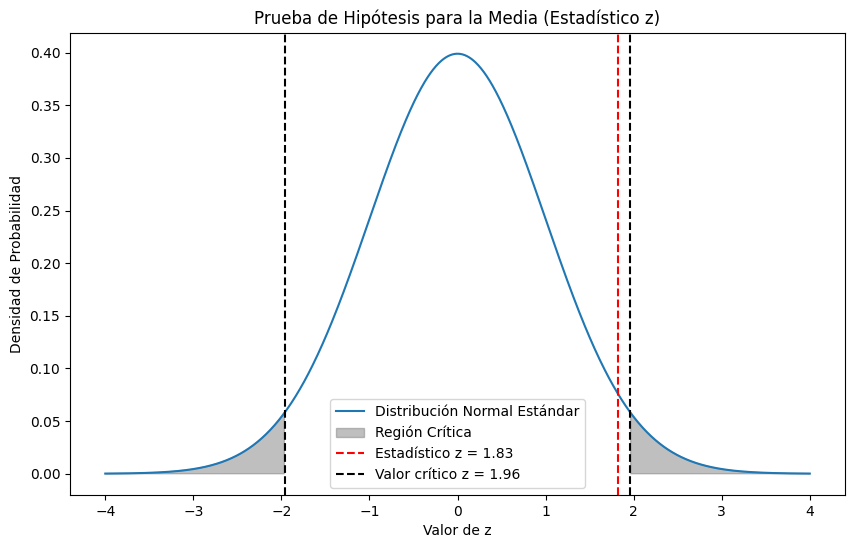

In [14]:
# Valores para el gráfico
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

# Calculo del valor crítico y p-valor
z_critical = stats.norm.ppf(1 - alpha/2)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
# Grafico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución Normal Estándar')
plt.fill_between(x, 0, y, where=(x > z_critical) | (x < -z_critical), color='gray', alpha=0.5, label='Región Crítica')
plt.axvline(z, color='red', linestyle='--', label=f'Estadístico z = {z:.2f}')
plt.axvline(z_critical, color='black', linestyle='--', label=f'Valor crítico z = {z_critical:.2f}')
plt.axvline(-z_critical, color='black', linestyle='--')
plt.title('Prueba de Hipótesis para la Media (Estadístico z)')
plt.xlabel('Valor de z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

### II.b) Gráfico del ejemplo con estadístico t

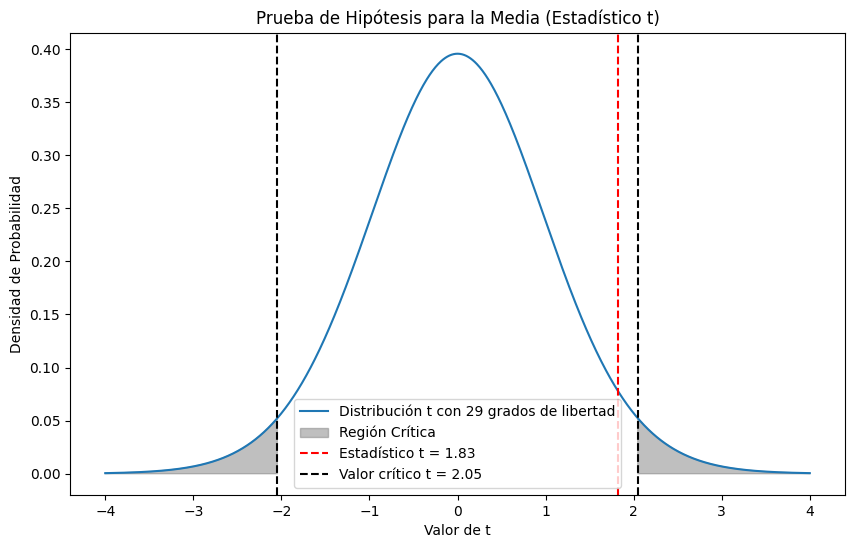

In [15]:
# Valores para el gráfico
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=n-1)

# Calculo del valor crítico y p-valor
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)
p_value = 2 * (1 - stats.t.cdf(abs(t), df=n-1))

# Grafico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Distribución t con {n-1} grados de libertad')
plt.fill_between(x, 0, y, where=(x > t_critical) | (x < -t_critical), color='gray', alpha=0.5, label='Región Crítica')
plt.axvline(t, color='red', linestyle='--', label=f'Estadístico t = {t:.2f}')
plt.axvline(t_critical, color='black', linestyle='--', label=f'Valor crítico t = {t_critical:.2f}')
plt.axvline(-t_critical, color='black', linestyle='--')
plt.title('Prueba de Hipótesis para la Media (Estadístico t)')
plt.xlabel('Valor de t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

______________________________________________________________________________________________________________________________________________________________________